In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier

In [2]:
data = tf.keras.datasets.cifar10

label_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [6]:
(x_train, y_train), (x_test_val, y_test_val) = data.load_data()

x_train.shape, x_test_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size = 0.5)

In [8]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [9]:
def create_model(
  filters = 32,
  kernel_size = (3, 3),
  pool_size = (2, 2),
  dropout_rate = 0.25,
  dense_units = 512,
  dense_dropout_rate = 0.5
):
  model = Sequential([
    Input(shape = (32, 32, 3)),
    Conv2D(filters = filters, kernel_size = kernel_size, activation = "relu"),
    Conv2D(filters = filters, kernel_size = kernel_size, activation = "relu"),
    MaxPooling2D(pool_size = pool_size),
    Dropout(dropout_rate),
    Conv2D(filters = filters * 2, kernel_size = kernel_size, activation = "relu"),
    Conv2D(filters = filters * 2, kernel_size = kernel_size, activation = "relu"),
    MaxPooling2D(pool_size = pool_size),
    Dropout(dropout_rate),
    Flatten(),
    Dense(units = dense_units, activation = "relu"),
    Dropout(dense_dropout_rate),
    Dense(10, activation = "softmax"),
  ])

  model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
estimator = KerasClassifier(model = create_model, verbose = 0)

param_grid = {
  "model__filters": [32, 64],
  "model__kernel_size": [(3, 3), (4, 4)],
  "model__pool_size": [(2, 2), (4, 4)],
  "model__dropout_rate": [0.2, 0.25],
  "model__dense_units": [256, 512],
  "model__dense_dropout_rate": [0.4, 0.5],
}

cv = 5

grid = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = cv, verbose = 0)

grid_output = grid.fit(x_train, y_train)

In [14]:
results_data = pd.DataFrame(grid_output.cv_results_)

results_data.to_csv("14-dumps/grid-search-results.csv", index = False)

In [13]:
grid_output.best_params_

{'model__dense_dropout_rate': 0.4,
 'model__dense_units': 512,
 'model__dropout_rate': 0.2,
 'model__filters': 64,
 'model__kernel_size': (3, 3),
 'model__pool_size': (2, 2)}

In [15]:
model = create_model(
  filters = 64,
  kernel_size = (3, 3),
  pool_size = (2, 2),
  dropout_rate = 0.2,
  dense_units = 512,
  dense_dropout_rate = 0.4
)

model_output = model.fit(x_train, y_train, batch_size = 128, epochs = 40, validation_data = (x_val, y_val))

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 214s 542ms/step - accuracy: 0.3202 - loss: 1.8183 - val_accuracy: 0.5572 - val_loss: 1.2426
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 211s 539ms/step - accuracy: 0.5635 - loss: 1.2131 - val_accuracy: 0.6544 - val_loss: 0.9695
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 210s 537ms/step - accuracy: 0.6546 - loss: 0.9856 - val_accuracy: 0.7144 - val_loss: 0.8372
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 209s 534ms/step - accuracy: 0.7030 - loss: 0.8475 - val_accuracy: 0.7258 - val_loss: 0.7817
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 211s 540ms/step - accuracy: 0.7378 - loss: 0.7432 - val_accuracy: 0.7436 - val_loss: 0.7178
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 220s 563ms/step - accuracy: 0.7598 - loss: 0.6817 - val_accuracy: 0.7638 - val_loss: 0.6773
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 208s 533ms/step - accuracy: 0.7836 - loss: 0.6154 - val_accuracy: 0.7740 - val_loss: 0.6601
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 209s 533ms/step - accuracy: 0.8042 -

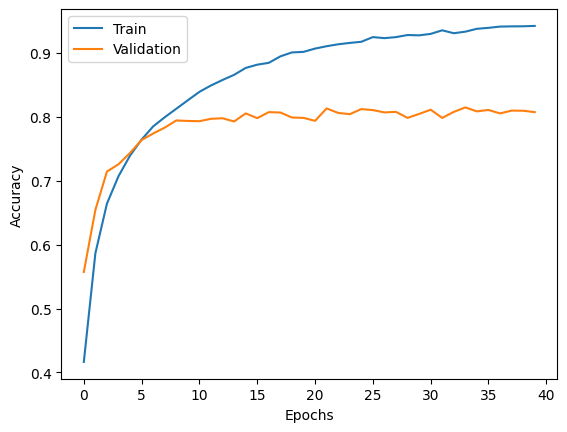

In [16]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

loss, accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.8139 - loss: 0.7160


(0.756547212600708, 0.8098000288009644)

In [18]:
model.save("14-dumps/model.keras")

In [19]:
from keras.models import load_model

model = load_model("14-dumps/model.keras")

In [29]:
num_images = 20
selected_x_test = x_test[:num_images]
selected_y_test = y_test[:num_images]

y_predict = model.predict(selected_x_test)

y_predict = np.argmax(y_predict, axis = 1)

y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([5, 2, 8, 4, 3, 1, 9, 1, 7, 2, 1, 6, 0, 7, 3, 6, 3, 8, 3, 4],
      dtype=int64)

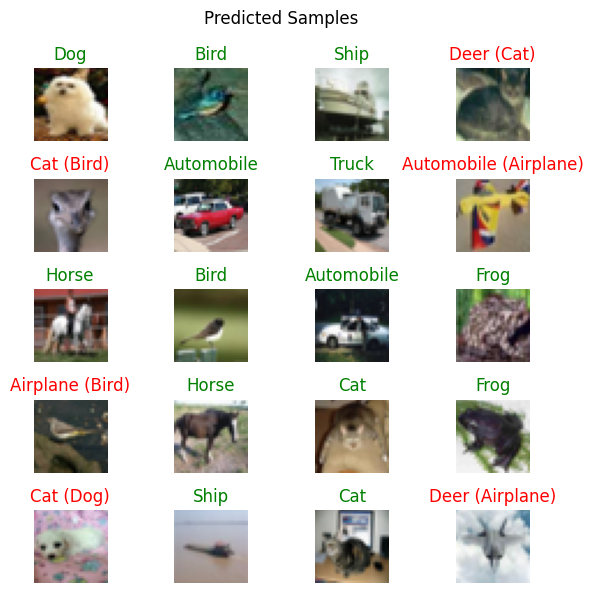

In [32]:
figure, axes = plt.subplots(5, 4, figsize = (6, 6))
axes = axes.ravel()

for i in range(len(axes)):
  predicted_class_index = y_predict[i]
  predicted_class_name = label_classes[predicted_class_index]

  actual_class_index = selected_y_test[i][0]
  actual_class_name = label_classes[actual_class_index]

  title = predicted_class_name if predicted_class_index == actual_class_index else f"{predicted_class_name} ({actual_class_name})"
  title_color = "green" if predicted_class_index == actual_class_index else "red"    

  axes[i].set_title(title, color = title_color)
  axes[i].imshow(selected_x_test[i])
  axes[i].axis("off")

figure.suptitle("Predicted Samples")
plt.tight_layout()
plt.show()